In [3]:
# https://scipy.github.io/devdocs/generated/scipy.interpolate.RegularGridInterpolator.html
import numpy as np

In [4]:
from scipy.interpolate import RegularGridInterpolator
def f(x, y, z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
data = f(*np.meshgrid(x, y, z, indexing='ij', sparse=True))

In [7]:
data.shape

(11, 22, 33)

In [43]:
x.shape

(11,)

In [8]:
my_interpolating_function = RegularGridInterpolator((x, y, z), data)

In [9]:
pts = np.array([[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]])
my_interpolating_function(pts)

array([125.80469388, 146.30069388])

---


In [10]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import root_numpy

Welcome to JupyROOT 6.12/06


In [11]:
f = r.TFile("../images/PDF_ry_y_r_combined_Calo05.root")
f.ls()
c = f.Get("c")
print([x for x in c.GetListOfPrimitives()])
c1 = c.GetPrimitive("c_1")
print([x for x in c1.GetListOfPrimitives()])
h5_ry_scaled = c1.GetPrimitive("h5_ry_scaled").Clone("h5_ry_scaled")
h5_ry_scaled.SetDirectory(0)

[<ROOT.TPad object ("c_1") at 0x7fffea34de50>, <ROOT.TPad object ("c_2") at 0x7fffed24d280>, <ROOT.TPad object ("c_3") at 0x7fffed369170>, <ROOT.TPad object ("c_4") at 0x7fffed39a5a0>]
[<ROOT.TFrame object ("TFrame") at 0x7fffea34dd30>, <ROOT.TH2D object ("h5_ry_scaled") at 0x7fffed20b6e0>, <ROOT.TPaveText object ("title") at 0x7fffed244ff0>]
TFile**		../images/PDF_ry_y_r_combined_Calo05.root	
 TFile*		../images/PDF_ry_y_r_combined_Calo05.root	
  KEY: TCanvas	c;1	c


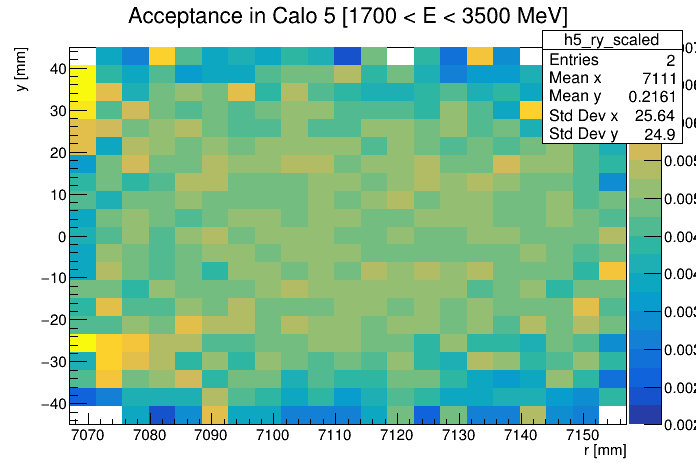

In [12]:
c = r.TCanvas()
h5_ry_scaled.Draw("colz")
c.Draw()

In [13]:
data, edges = root_numpy.hist2array(h5_ry_scaled,return_edges=True)

In [14]:
data[0]

array([0.        , 0.00270027, 0.00465116, 0.00402068, 0.00770077,
       0.00464728, 0.00427673, 0.00498148, 0.00387197, 0.00399546,
       0.00400586, 0.00384211, 0.00465863, 0.00438374, 0.00372881,
       0.00586054, 0.0058309 , 0.0066054 , 0.00878049, 0.0078329 ,
       0.        ])

In [15]:
edges

[array([7067.        , 7071.28571429, 7075.57142857, 7079.85714286,
        7084.14285714, 7088.42857143, 7092.71428571, 7097.        ,
        7101.28571429, 7105.57142857, 7109.85714286, 7114.14285714,
        7118.42857143, 7122.71428571, 7127.        , 7131.28571429,
        7135.57142857, 7139.85714286, 7144.14285714, 7148.42857143,
        7152.71428571, 7157.        ]),
 array([-45.        , -40.71428571, -36.42857143, -32.14285714,
        -27.85714286, -23.57142857, -19.28571429, -15.        ,
        -10.71428571,  -6.42857143,  -2.14285714,   2.14285714,
          6.42857143,  10.71428571,  15.        ,  19.28571429,
         23.57142857,  27.85714286,  32.14285714,  36.42857143,
         40.71428571,  45.        ])]

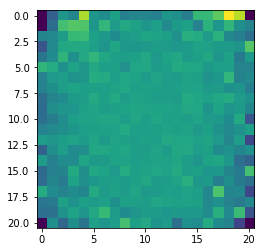

In [16]:
plt.imshow(data,origin='upper')
plt.show()

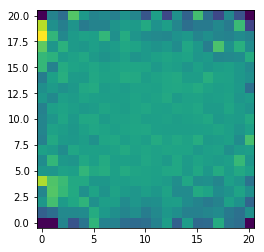

In [17]:
plt.imshow(data.T,origin='lower')
plt.show()

In [45]:
binLocations = []
binContents = []

binContents2 = []
for i in range(1,h5_ry_scaled.GetNbinsX()):
    binContents2i = []
    for j in range(1,h5_ry_scaled.GetNbinsY()):
        centerix = h5_ry_scaled.GetXaxis().GetBinCenter(i)
        centeriy = h5_ry_scaled.GetYaxis().GetBinCenter(j)
        contenti = h5_ry_scaled.GetBinContent(i,j)
        #print(centerix ,centeriy , contenti)
        
        binLocations.append((centerix, centeriy))
        binContents.append(contenti)
        binContents2i.append(contenti)
    binContents2.append(binContents2i)

ding = np.array([np.array(x) for x in zip(*binLocations)])
binContents2 = np.array(binContents2)

binLocations = np.array(binLocations)
binContents = np.array(binContents)

In [49]:
binLocations = [[],[]]

for i in range(1,h5_ry_scaled.GetNbinsX()):
    centerix = h5_ry_scaled.GetXaxis().GetBinCenter(i)
    binLocations[0].append(centerix)
    
for j in range(1,h5_ry_scaled.GetNbinsY()):
    centeriy = h5_ry_scaled.GetYaxis().GetBinCenter(j)
    binLocations[1].append(centeriy)

binLocations = np.array(binLocations)

In [50]:
binLocations[0].shape

(20,)

In [51]:
binContents2.shape

(20, 20)

In [79]:
my_interpolating_function = RegularGridInterpolator(binLocations, binContents2)

In [81]:
my_interpolating_function((1,2))

ValueError: One of the requested xi is out of bounds in dimension 0

In [124]:
xs = np.linspace(-20,20,100)
ys = np.linspace(7110,7112,100)

grid = np.meshgrid(xs,ys, indexing="ij")

In [132]:
grid

[array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.5959596 , -19.5959596 , -19.5959596 , ..., -19.5959596 ,
         -19.5959596 , -19.5959596 ],
        [-19.19191919, -19.19191919, -19.19191919, ..., -19.19191919,
         -19.19191919, -19.19191919],
        ...,
        [ 19.19191919,  19.19191919,  19.19191919, ...,  19.19191919,
          19.19191919,  19.19191919],
        [ 19.5959596 ,  19.5959596 ,  19.5959596 , ...,  19.5959596 ,
          19.5959596 ,  19.5959596 ],
        [ 20.        ,  20.        ,  20.        , ...,  20.        ,
          20.        ,  20.        ]]),
 array([[7110.        , 7110.02020202, 7110.04040404, ..., 7111.95959596,
         7111.97979798, 7112.        ],
        [7110.        , 7110.02020202, 7110.04040404, ..., 7111.95959596,
         7111.97979798, 7112.        ],
        [7110.        , 7110.02020202, 7110.04040404, ..., 7111.95959596,
         7111.97979798, 7112.      

In [125]:
points = np.array([[y,x] for (x,y) in zip(grid[0].ravel(), grid[1].ravel())])

In [126]:
points[0]

array([7110.,  -20.])

In [127]:
my_interpolating_function([[7100,3],[7111,2]])

array([0.00499885, 0.0050674 ])

In [128]:
points

array([[7110.        ,  -20.        ],
       [7110.02020202,  -20.        ],
       [7110.04040404,  -20.        ],
       ...,
       [7111.95959596,   20.        ],
       [7111.97979798,   20.        ],
       [7112.        ,   20.        ]])

In [129]:
ding = my_interpolating_function(points)

[]

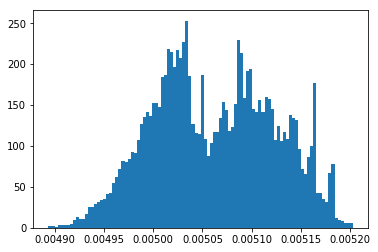

In [130]:
plt.hist(ding,bins=100)
plt.plot()

In [138]:
dong = [ x for x in zip(*points) ]

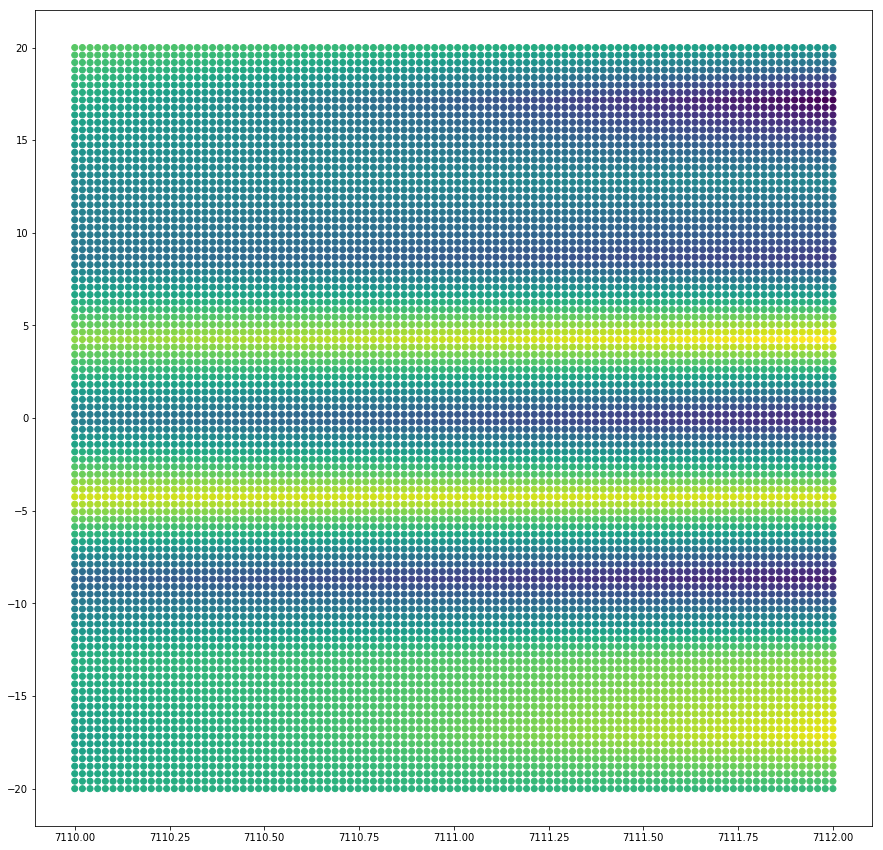

In [142]:
fig,ax = plt.subplots(figsize=(15,15))
plt.scatter(dong[0], dong[1],c=ding)
plt.plot()
plt.plot()
plt.show()